### Name: Mohammad Mowlavi
### StudentId: 

# Librarires

In [1]:
import numpy as np
import random

from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans as SklearnKmeans

# Load Dataset

In [2]:
data = fetch_california_housing()
X = data.data
sample_numbers = 4000
indices = np.random.choice(X.shape[0], sample_numbers, replace=False)
x_data = X[indices]

In [3]:
data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

# Implement KMeans algorithm (do not use any libraries and implement it from scratch)

In [4]:
#TODO
class KMeans:
    def __init__(self, n_clusters=5, max_iter=1000):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.centroids = None
        self.labels = None

    def fit(self, X):
        self.centroids = X[random.sample(range(len(X)), self.n_clusters)]

        for i in range(self.max_iter):
            self.labels = self._assign_clusters(X)
            new_centroids = self._compute_centroids(X)

            if np.all(new_centroids == self.centroids):
                break

            self.centroids = new_centroids

    def _assign_clusters(self, X):
        labels = []
        for point in X:
            distances = [np.linalg.norm(point - centroid) for centroid in self.centroids]
            labels.append(np.argmin(distances))
        return np.array(labels)

    def _compute_centroids(self, X):
        centroids = []
        for i in range(self.n_clusters):
            points_in_cluster = X[self.labels == i]
            centroids.append(points_in_cluster.mean(axis=0))
        return np.array(centroids)

    def predict(self, X):
        return self._assign_clusters(X)

In [5]:
k_means = KMeans()
k_means.fit(x_data)

print("labels:", k_means.labels)
print("centroids:", k_means.centroids)

labels: [2 1 0 ... 2 1 2]
centroids: [[ 3.76276941e+00  2.32683363e+01  5.10725862e+00  1.06695377e+00
   2.46474597e+03  3.18437366e+00  3.51503578e+01 -1.19155116e+02]
 [ 3.86973007e+00  3.22250859e+01  5.64750295e+00  1.13491647e+00
   6.97259450e+02  2.75037973e+00  3.59148740e+01 -1.19794301e+02]
 [ 3.75632404e+00  2.85690571e+01  5.19865373e+00  1.06266443e+00
   1.44444290e+03  2.99025108e+00  3.55381541e+01 -1.19541906e+02]
 [ 4.34318378e+00  9.70270270e+00  5.95176295e+00  1.09158011e+00
   8.67743243e+03  3.02549531e+00  3.52678378e+01 -1.18932703e+02]
 [ 3.89264803e+00  1.66381579e+01  5.24753625e+00  1.07456621e+00
   4.41309211e+03  3.32988648e+00  3.51815132e+01 -1.19062697e+02]]


# Use elbow method and silhouette method to choose optimal cluster numbers

In [7]:
#TODO
def elbow_method(X, max_k):
    wcss = []
    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, max_iter=1000)
        kmeans.fit(X)
        wcss.append(np.sum([np.linalg.norm(X[i] - kmeans.centroids[kmeans.labels[i]])**2 for i in range(len(X))]))

    plt.plot(range(1, max_k + 1), wcss, 'bx-')
    plt.xlabel('number of clusters')
    plt.ylabel('WCSS')
    plt.title('elbow method for optimal k')
    plt.show()

    print("WCSS scores are:", wcss)

def silhouette_method(X, max_k):
    silhouette_scores = []
    for k in range(2, max_k + 1):
        kmeans = KMeans(n_clusters=k, max_iter=1000)
        kmeans.fit(X)
        labels = kmeans.labels
        silhouette_scores.append(silhouette_score(X, labels))

    plt.plot(range(2, max_k + 1), silhouette_scores, 'bx-')
    plt.xlabel('number of clusters')
    plt.ylabel('silhouette score')
    plt.title('silhouette method for optimal k')
    plt.show()

    print("silhouette scores are:", silhouette_scores)


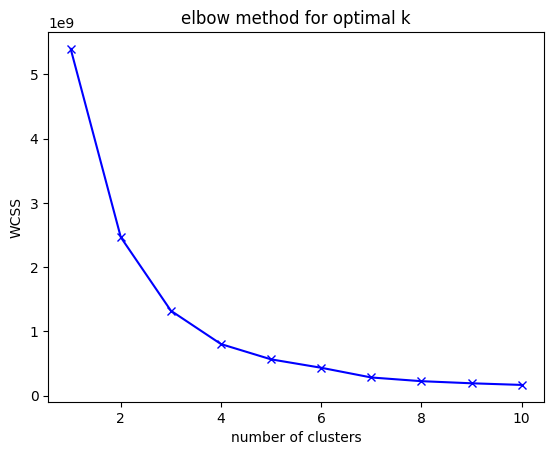

WCSS scores are: [5396238805.497545, 2464976752.3738427, 1321234037.61413, 802025861.5423396, 564277205.9242022, 433447562.8532604, 282286539.1556104, 224585988.16809636, 191829252.4952643, 166393220.4335075]


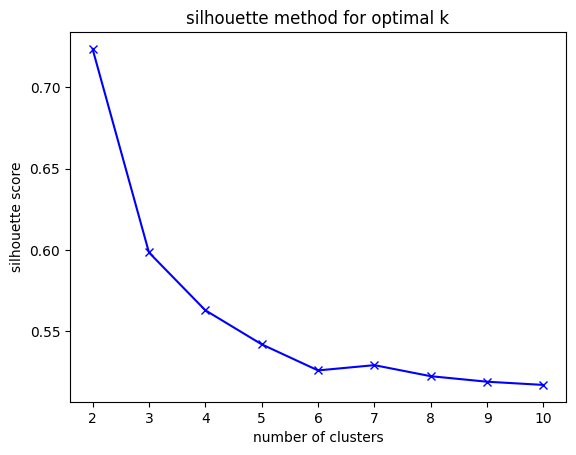

silhouette scores are: [0.7234634924985148, 0.5984618238965459, 0.5629662712536065, 0.5420418499100916, 0.5260110873960037, 0.5292397169932618, 0.5224576377282812, 0.5190668120587988, 0.5171008571573548]


In [8]:
max_k = 10
elbow_method(x_data, max_k)

silhouette_method(x_data, max_k)

# Compare your k means algorithm with sklearn k means algorithm (compare it with both elbow and silhouette method)

In [9]:
#TODO
#TODO
def elbow_method(X, max_k):
    wcss = []
    for k in range(1, max_k + 1):
        kmeans = SklearnKmeans(n_clusters=k, max_iter=1000)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)

    plt.plot(range(1, max_k + 1), wcss, 'bx-')
    plt.xlabel('number of clusters')
    plt.ylabel('WCSS')
    plt.title('elbow method for optimal k')
    plt.show()

    print('WCSS scores are:', wcss)

def silhouette_method(X, max_k):
    silhouette_scores = []
    for k in range(2, max_k + 1):
        kmeans = SklearnKmeans(n_clusters=k, max_iter=1000)
        labels = kmeans.fit_predict(X)
        silhouette_scores.append(silhouette_score(X, labels))

    plt.plot(range(2, max_k + 1), silhouette_scores, 'bx-')
    plt.xlabel('number of clusters')
    plt.ylabel('silhouette score')
    plt.title('silhouette method for optimal k')
    plt.show()

    print("silhouette scores are:", silhouette_scores)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

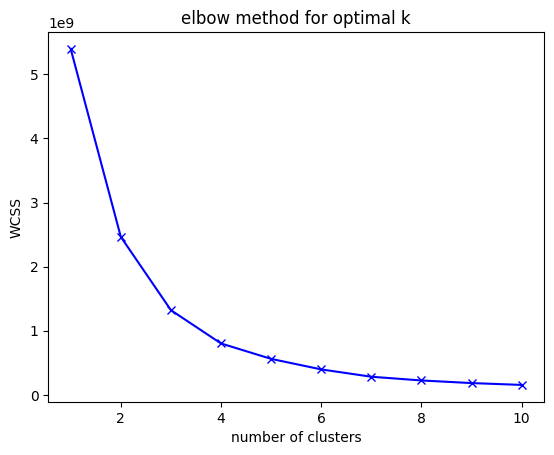

WCSS scores are: [5396238805.497549, 2464913333.2602453, 1321234655.9203186, 801539632.4923465, 561045281.8817053, 396897843.05488694, 282322276.18264085, 224208920.4432308, 183552983.54416424, 154679824.7647465]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

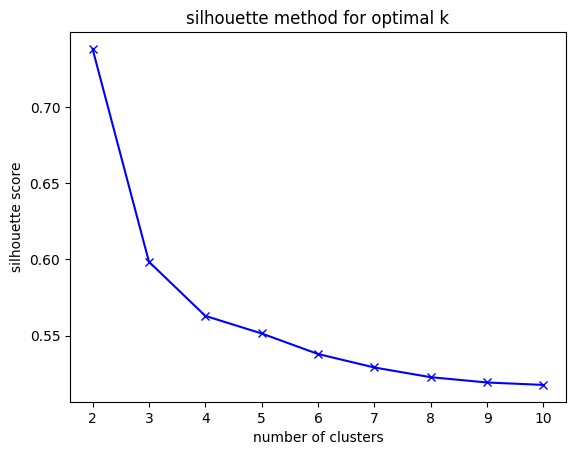

silhouette scores are: [0.7381466662574359, 0.5984618238965459, 0.5629329758009567, 0.5513811374146874, 0.5379037464451589, 0.5290547267848508, 0.5226910460479283, 0.5192112334002973, 0.5176162249134497]


In [10]:
max_k = 10
elbow_method(x_data, max_k)

silhouette_method(x_data, max_k)

### what is the optimal cluster number based on your custom kmeans algorithm and sklearn kmeans algorithm? if answer is different based on each algorithm then explain difference




Considering that wcss is in the form of 1/x, it is not possible to determine a good number for the number of melasters and it does not have fractures. But approximately 4 clusters may be the best option. But in the silhoutte method, the higher the number, the more distant the clusters are and the better they are grouped, and the lower the numbers, the worse. So with this method, 2 clusters are the most optimal.


Answer is different becuase the elbow method only uses intra-cluster distances while the silhouette method uses a combination of inter- and intra-cluster distances

### would you prefer elbow method for determining optimal cluster number or silhouette method?
#### I prefer silhouette method because in elbow method sometimes it's hard to say where is the elbow point but silhouette method is more deterministic rather than elbow method